# Final Project: Data processing/EDA

## Initial Data Intake

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

# Read in data
DATA_PATH = "/content/drive/My Drive/DAT207/Final Project"

In [12]:
# Function to loop through directories to read in files
def load_data(path_to_data):
    """
    Load datasets

    Parameters:
    path_to_data (str): This is the path to data

    Returns:
    nba_data: A pandas dataframe
    """
    # List all files in data directory
    file_list = os.listdir(path_to_data)

    # Initialize data
    dfs = []

    # Loop through files and read only the raw_scores.txt files
    for file in file_list:
        if file.startswith("raw_scores") and file.endswith(".txt"):
            file_path = os.path.join(path_to_data, file)
            df = pd.read_csv(file_path, delimiter=',', skiprows=[0], header=None)
            dfs.append(df)

    # Concatenate all DataFrames into a single DataFrame
    nba_df = pd.concat(dfs, ignore_index=True)

    # Name columns
    nba_df.columns = ["game_date", "game_sequence", "game_id", "team_id", "team_abbr",
                      "team_city", "game_result", "pts_q1", "pts_q2", "pts_q3",
                      "pts_q4", "pts_ot1", "pts_ot2", "pts_ot3", "pts_ot4", "pts_ot5",
                      "pts_ot6", "pts_ot7", "pts_ot8", "pts_ot9", "pts_ot10", "pts_tot",
                      "fg_pct", "ft_pct", "fg3_pct", "ast", "reb", "tov"]

    return nba_df

# Load data
nba_df = load_data(DATA_PATH)
# Index teams within game
nba_df['team_ind'] = nba_df.groupby('game_id').cumcount()


In [13]:
# Load data
nba_df = load_data(DATA_PATH)

# Index teams within game
nba_df['team_ind'] = nba_df.groupby('game_id').cumcount()

In [14]:
# Examine data
nba_df.head()

,game_date,game_sequence,game_id,team_id,team_abbr,team_city,game_result,pts_q1,pts_q2,pts_q3,...,pts_ot9,pts_ot10,pts_tot,fg_pct,ft_pct,fg3_pct,ast,reb,tov,team_ind
0,2012-10-30,1,21200001,1610612764,WAS,Washington,0-1,24,15,23,...,0.0,0.0,84,0.356,0.600,0.250,26,39,12,0
1,2012-10-30,1,21200001,1610612739,CLE,Cleveland,1-0,31,19,24,...,0.0,0.0,94,0.456,0.682,0.350,22,54,20,1
2,2012-10-30,2,21200002,1610612738,BOS,Boston,0-1,25,29,22,...,0.0,0.0,107,0.520,0.821,0.462,24,41,15,0
3,2012-10-30,2,21200002,1610612748,MIA,Miami,1-0,31,31,31,...,0.0,0.0,120,0.544,0.813,0.500,25,36,8,1
4,2012-10-30,3,21200003,1610612742,DAL,Dallas,1-0,25,23,26,...,0.0,0.0,99,0.471,0.778,0.333,22,40,11,0


In [15]:
# Dimensions
print("Shape:", nba_df.shape)

# Check NAs
print(nba_df.isna().sum())

Shape: (17226, 29)
game_date        0
game_sequence    0
game_id          0
team_id          0
team_abbr        0
team_city        0
game_result      0
pts_q1           0
pts_q2           0
pts_q3           0
pts_q4           0
pts_ot1          0
pts_ot2          0
pts_ot3          0
pts_ot4          0
pts_ot5          2
pts_ot6          2
pts_ot7          2
pts_ot8          2
pts_ot9          2
pts_ot10         2
pts_tot          0
fg_pct           0
ft_pct           0
fg3_pct          0
ast              0
reb              0
tov              0
team_ind         0
dtype: int64


## Pre-processing

In [16]:
# Pivot wide by team_ind
varlist = ["game_date", "game_sequence","team_id","team_abbr",
            "team_city","game_result","pts_q1","pts_q2","pts_q3",
            "pts_q4","pts_ot1","pts_ot2","pts_ot3","pts_ot4","pts_ot5",
            "pts_ot6","pts_ot7","pts_ot8","pts_ot9","pts_ot10","pts_tot",
            "fg_pct","ft_pct","fg3_pct","ast","reb","tov"]
nba_df_wide = nba_df.pivot(index='game_id', columns='team_ind', values=varlist).reset_index()

# Inspect data
nba_df_wide.head()

game_id   game_date             game_sequence        team_id  \
team_ind                     0           1             0  1           0   
0         21200001  2012-10-30  2012-10-30             1  1  1610612764   
1         21200002  2012-10-30  2012-10-30             2  2  1610612738   
2         21200003  2012-10-30  2012-10-30             3  3  1610612742   
3         21200004  2012-10-31  2012-10-31             1  1  1610612754   
4         21200005  2012-10-31  2012-10-31             2  2  1610612743   

                     team_abbr        team_city  ... ft_pct        fg3_pct  \
team_ind           1         0    1           0  ...      0      1       0   
0         1610612739       WAS  CLE  Washington  ...    0.6  0.682    0.25   
1         1610612748       BOS  MIA      Boston  ...  0.821  0.813   0.462   
2         1610612747       DAL  LAL      Dallas  ...  0.778  0.387   0.333   
3         1610612761       IND  TOR     Indiana  ...  0.688  0.842   0.455   
4         1610612755       DEN  PHI      Denver  ...  0.455   0.81   0.222   

                ast     reb     tov      
team_ind      1   0   1   0   1   0   1  
0          0.35  26  22  39  54  12  20  
1           0.5  24  25  41  36  15   8  
2         0.231  22  24  40  46  11  14  
3         0.353  22  18  46  42  18  10  
4          0.28  19  18  54  47  20  15  

[5 rows x 55 columns]

# EDA

In [18]:
# Inspect the data
print(nba_df.head())
print(nba_df.info())

    game_date  game_sequence   game_id     team_id team_abbr   team_city  \
0  2012-10-30              1  21200001  1610612764       WAS  Washington   
1  2012-10-30              1  21200001  1610612739       CLE   Cleveland   
2  2012-10-30              2  21200002  1610612738       BOS      Boston   
3  2012-10-30              2  21200002  1610612748       MIA       Miami   
4  2012-10-30              3  21200003  1610612742       DAL      Dallas   

  game_result  pts_q1  pts_q2  pts_q3  ...  pts_ot9  pts_ot10  pts_tot  \
0         0-1      24      15      23  ...      0.0       0.0       84   
1         1-0      31      19      24  ...      0.0       0.0       94   
2         0-1      25      29      22  ...      0.0       0.0      107   
3         1-0      31      31      31  ...      0.0       0.0      120   
4         1-0      25      23      26  ...      0.0       0.0       99   

   fg_pct  ft_pct  fg3_pct  ast  reb  tov  team_ind  
0   0.356   0.600    0.250   26   39   12   

In [19]:
# Summary statistics
print(nba_df.describe())

       game_sequence       game_id       team_id        pts_q1        pts_q2  \
count   17226.000000  1.722600e+04  1.722600e+04  17226.000000  17226.000000   
mean        4.863694  2.150413e+07  1.610613e+09     25.948102     26.021944   
std         2.979173  2.747861e+05  7.666169e+01      5.801384      5.787308   
min         1.000000  2.120000e+07  1.610613e+09      0.000000      0.000000   
25%         2.000000  2.130092e+07  1.610613e+09     22.000000     22.000000   
50%         4.000000  2.150062e+07  1.610613e+09     26.000000     26.000000   
75%         7.000000  2.170031e+07  1.610613e+09     30.000000     30.000000   
max        15.000000  3.170000e+07  1.610617e+09     53.000000     52.000000   

             pts_q3        pts_q4       pts_ot1       pts_ot2       pts_ot3  \
count  17226.000000  17226.000000  17226.000000  17226.000000  17226.000000   
mean      25.592767     25.298038      0.606699      0.090561      0.016545   
std        5.837063      5.825592      2.6

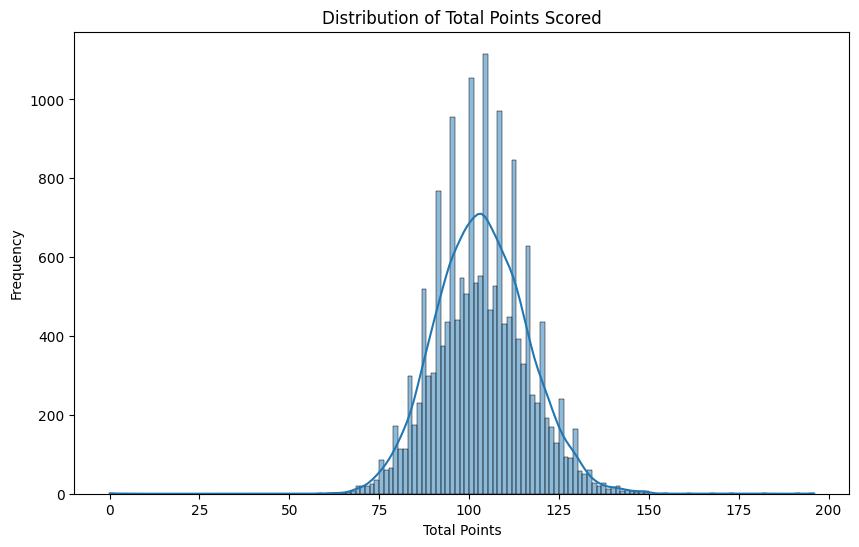

In [21]:
# Distribution of total points scored
plt.figure(figsize=(10, 6))
sns.histplot(nba_df['pts_tot'], kde=True)
plt.title('Distribution of Total Points Scored')
plt.xlabel('Total Points')
plt.ylabel('Frequency')
plt.show()

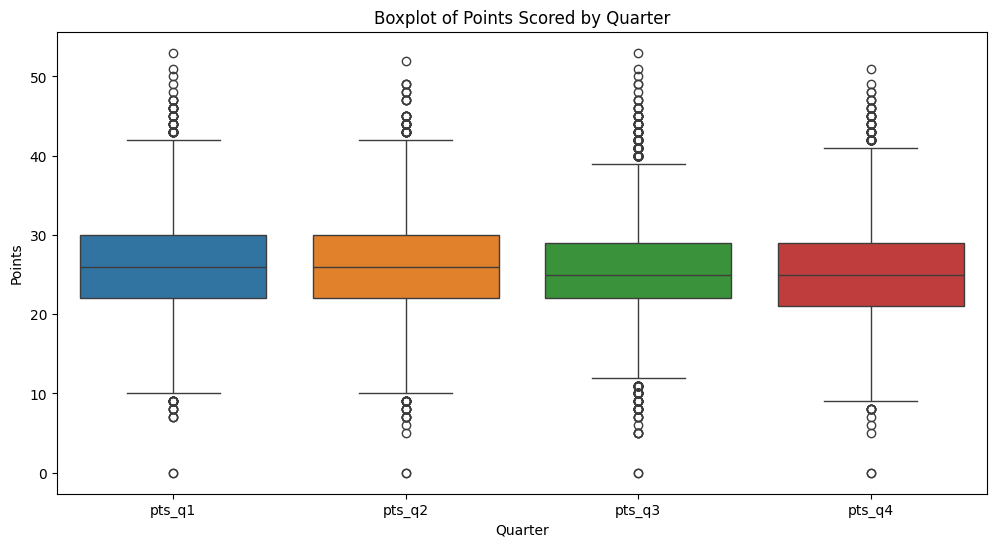

In [22]:
# Boxplot of points scored by each quarter
plt.figure(figsize=(12, 6))
sns.boxplot(data=nba_df[['pts_q1', 'pts_q2', 'pts_q3', 'pts_q4']])
plt.title('Boxplot of Points Scored by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Points')
plt.show()

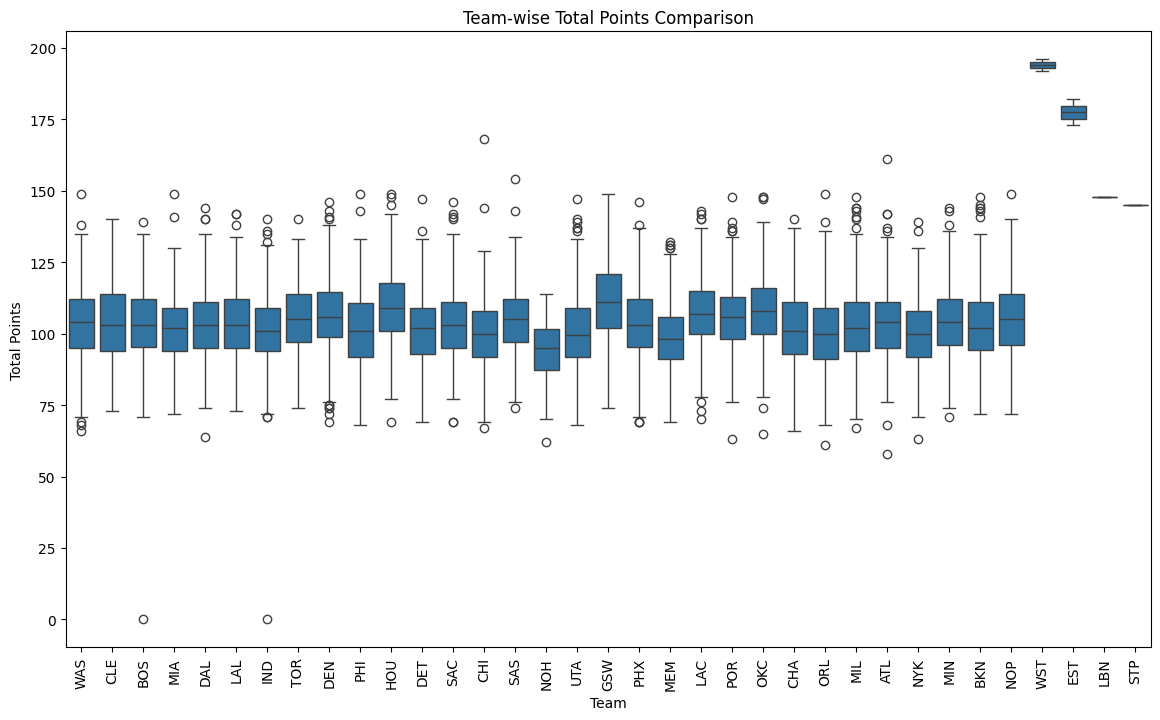

In [23]:
# Team-wise points comparison
plt.figure(figsize=(14, 8))
sns.boxplot(x='team_abbr', y='pts_tot', data=nba_df)
plt.title('Team-wise Total Points Comparison')
plt.xlabel('Team')
plt.ylabel('Total Points')
plt.xticks(rotation=90)
plt.show()

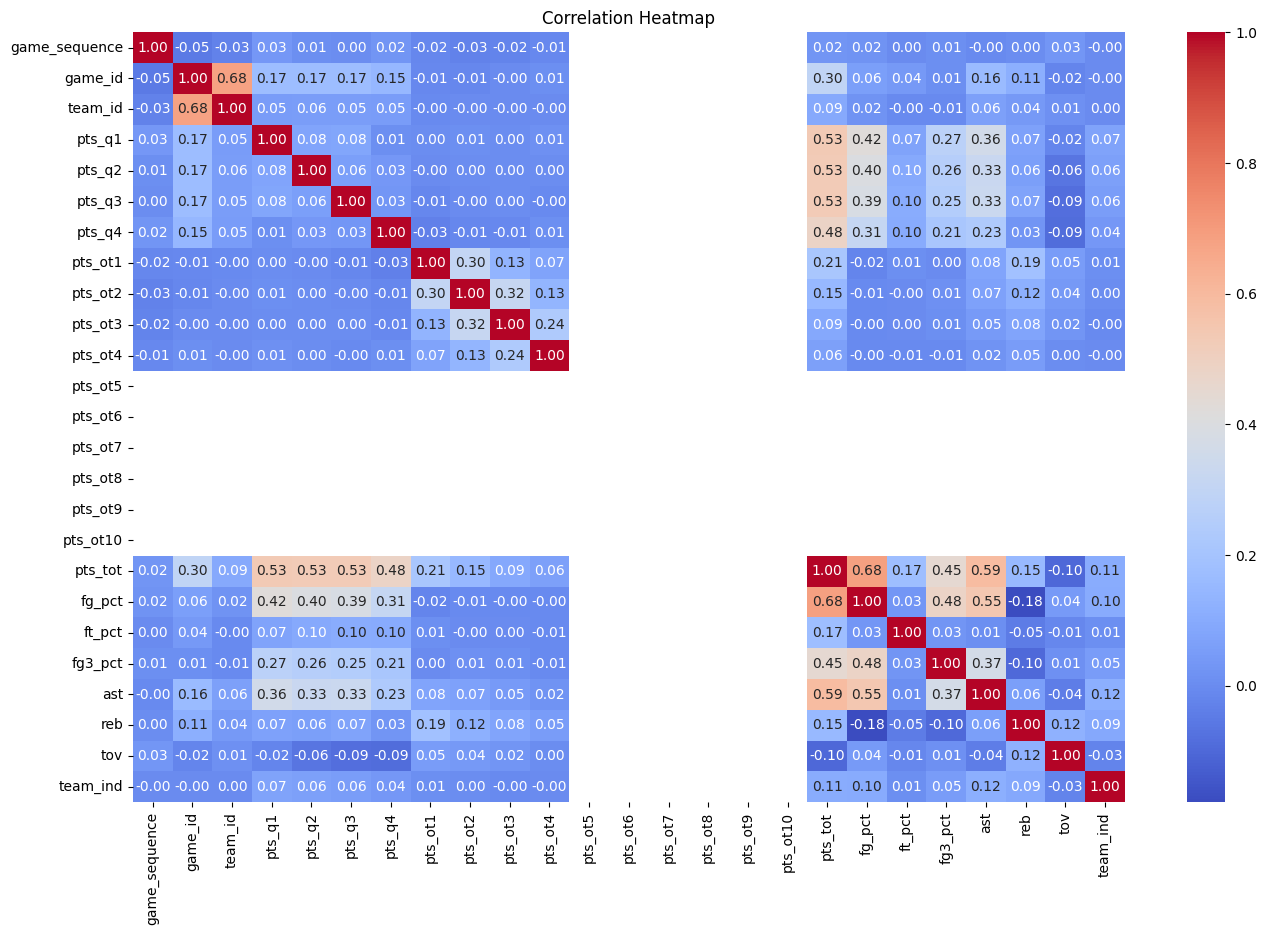

In [30]:
# Correlation heatmap
plt.figure(figsize=(16, 10))
numeric_cols = nba_df.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(nba_df[numeric_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

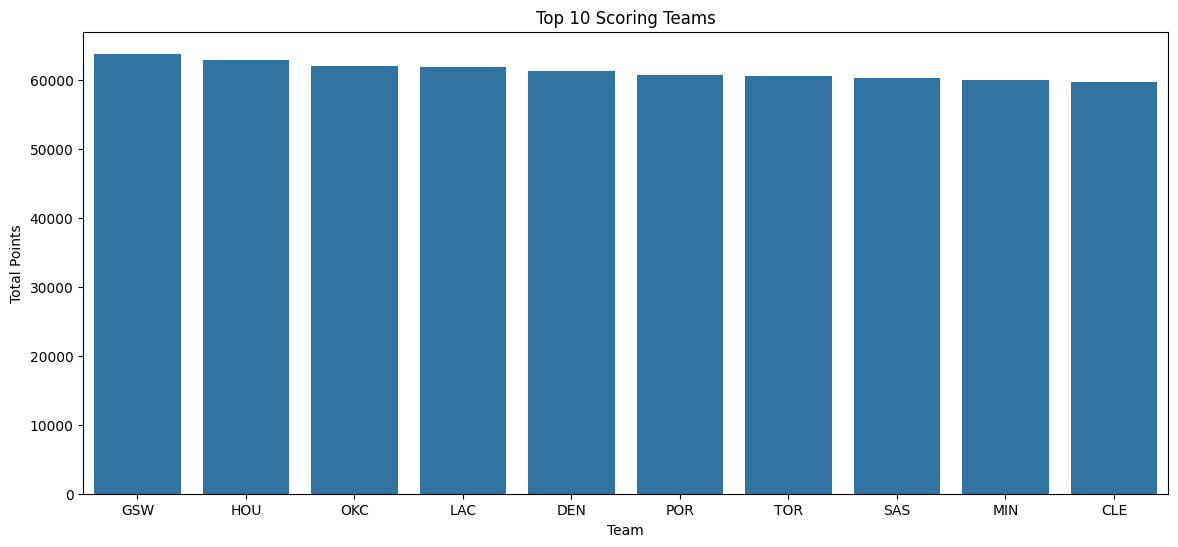

In [25]:
# Top scoring teams
top_teams = nba_df.groupby('team_abbr')['pts_tot'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 6))
sns.barplot(x=top_teams.index, y=top_teams.values)
plt.title('Top 10 Scoring Teams')
plt.xlabel('Team')
plt.ylabel('Total Points')
plt.show()

In [26]:
# Adding a column for win/loss
nba_df['win_loss'] = nba_df['game_result'].apply(lambda x: 'Win' if x.split('-')[0] > x.split('-')[1] else 'Loss')

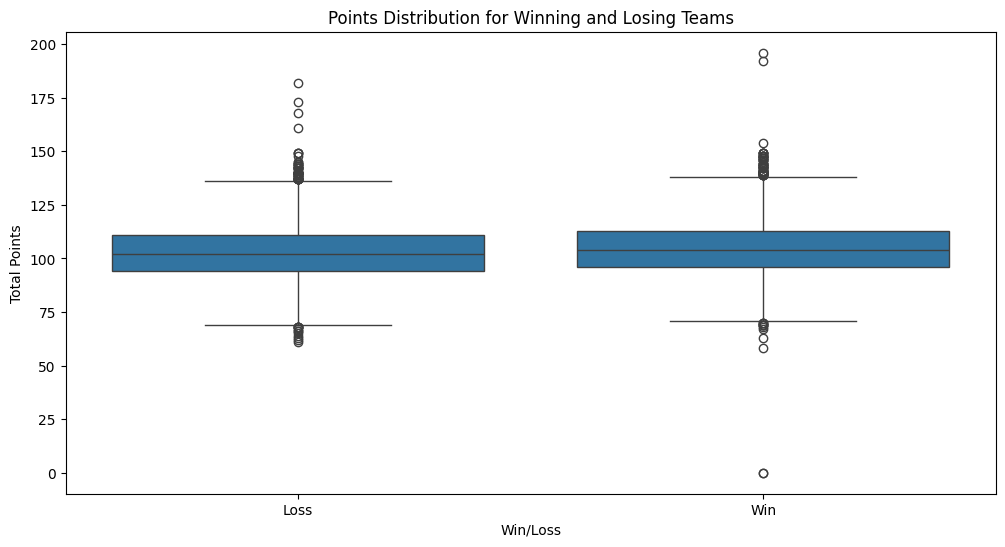

In [27]:
# Boxplot of points for winning and losing teams
plt.figure(figsize=(12, 6))
sns.boxplot(x='win_loss', y='pts_tot', data=nba_df)
plt.title('Points Distribution for Winning and Losing Teams')
plt.xlabel('Win/Loss')
plt.ylabel('Total Points')
plt.show()

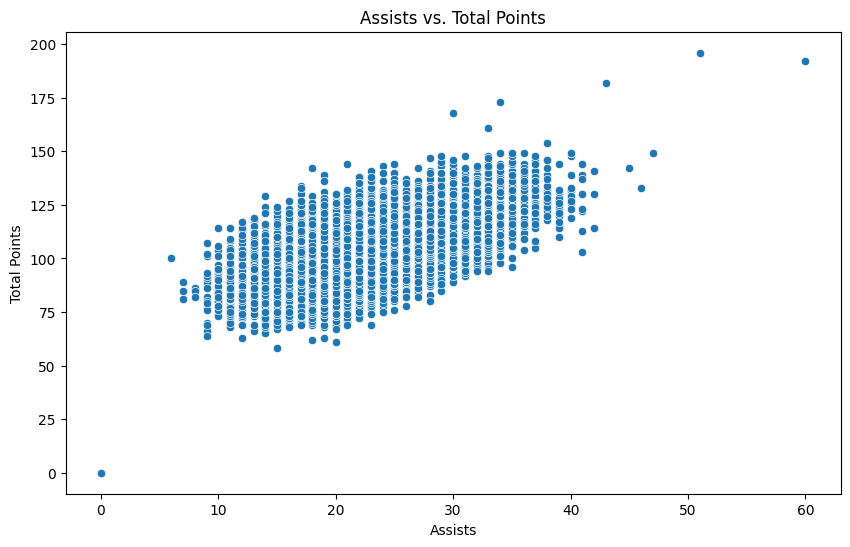

In [28]:
# Scatter plot of assists vs. points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ast', y='pts_tot', data=nba_df)
plt.title('Assists vs. Total Points')
plt.xlabel('Assists')
plt.ylabel('Total Points')
plt.show()

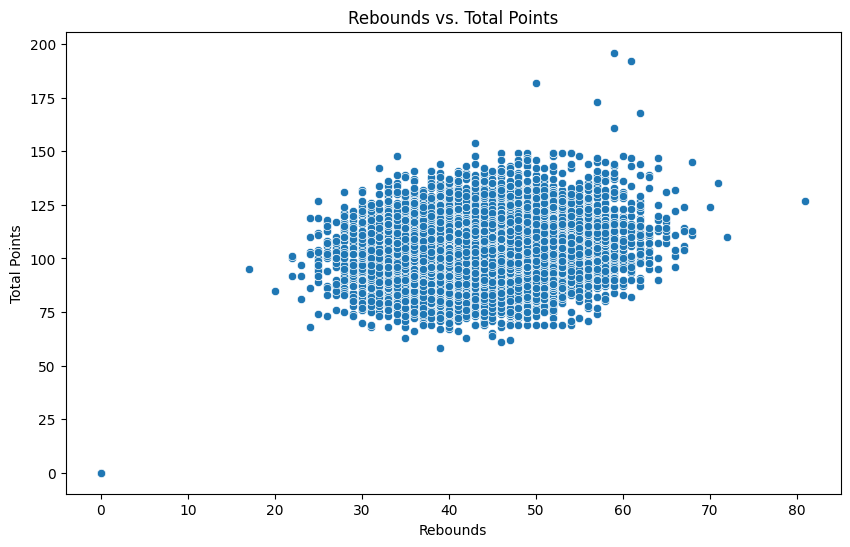

In [29]:
# Scatter plot of rebounds vs. points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reb', y='pts_tot', data=nba_df)
plt.title('Rebounds vs. Total Points')
plt.xlabel('Rebounds')
plt.ylabel('Total Points')
plt.show()